*Loading the Data
*Data Analysis
*Merging Both the Data
*Split train and Test Data


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ppd = pd.read_csv('C:/Users/gpathak2/Downloads/pp-complete.csv' , header = None)
ppd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,NaN,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A


In [2]:
ppd.columns = ["Transaction unique identifier", "Price", "Date of Transfer", "Postcode", "Property Type", "Old/New", "Duration", "PAON", "SAON", "Street", "Locality", "Town/City", "District", "County", "PPD Category Type", "Record Status - monthly file only"]
ppd.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,NaN,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A


In [3]:
ppd.shape

(26467225, 16)

In [4]:
len(ppd.drop_duplicates())

26467225

In [5]:
ppd.isnull().sum()

Transaction unique identifier               0
Price                                       0
Date of Transfer                            0
Postcode                                42456
Property Type                               0
Old/New                                     0
Duration                                    0
PAON                                     4196
SAON                                 23380919
Street                                 414766
Locality                              8958348
Town/City                                   0
District                                    0
County                                      0
PPD Category Type                           0
Record Status - monthly file only           0
dtype: int64

In [6]:
# creating a new column Year of Transfer 
ppd['Year of Transfer']= ppd['Date of Transfer'].str[:4]

ppd.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year of Transfer
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07 00:00,MK15 9HP,D,N,F,31,NaN,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A,1995
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03 00:00,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A,1995
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13 00:00,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A,1995
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28 00:00,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A,1995
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28 00:00,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A,1995


In [7]:
##Drop columns 
ppd = ppd.drop(columns=['SAON' , 'Date of Transfer' ])
ppd.shape

(26467225, 15)

In [8]:
#filtered the data just for coventry city
ppd_coventry = ppd[ppd['Town/City'] == 'COVENTRY'].copy()

In [9]:
ppd_coventry.shape

(152516, 15)

In [10]:
#verifying if there is other data for same city or not 
ppd_coventry1 = ppd[ppd['Town/City'] == 'Coventry'].copy()
ppd_coventry1.shape

(0, 15)

In [11]:
ppd_coventry2 = ppd[ppd['Town/City'] == 'coventry'].copy()
ppd_coventry2.shape

(0, 15)

In [12]:
ppd_coventry.isnull().sum()

Transaction unique identifier             0
Price                                     0
Postcode                                124
Property Type                             0
Old/New                                   0
Duration                                  0
PAON                                      0
Street                                   60
Locality                             102370
Town/City                                 0
District                                  0
County                                    0
PPD Category Type                         0
Record Status - monthly file only         0
Year of Transfer                          0
dtype: int64

In [13]:
##Drop columns 
ppd_coventry = ppd_coventry.drop(columns=['Locality'])
ppd_coventry.shape

(152516, 14)

In [14]:
coventry_data = ppd_coventry.dropna()

In [15]:
coventry_data.isnull().sum()

Transaction unique identifier        0
Price                                0
Postcode                             0
Property Type                        0
Old/New                              0
Duration                             0
PAON                                 0
Street                               0
Town/City                            0
District                             0
County                               0
PPD Category Type                    0
Record Status - monthly file only    0
Year of Transfer                     0
dtype: int64

In [16]:
coventry_data.shape

(152333, 14)

In [17]:
#Details of price 
coventry_data['Price'].describe()

count    1.523330e+05
mean     1.408904e+05
std      3.490310e+05
min      1.000000e+02
25%      6.800000e+04
50%      1.150000e+05
75%      1.650000e+05
max      6.020000e+07
Name: Price, dtype: float64

In [18]:
#Shape of outliers
df = coventry_data[coventry_data['Price']>10000000]
df.shape

(28, 14)

In [19]:
df1 = coventry_data[coventry_data['Price']<10000]
df1.shape

(177, 14)

In [20]:
#Removing Outliers from the dataset
cv_data = coventry_data.loc[(coventry_data['Price'] < (10000000)),]
cv_data.shape

(152305, 14)

<AxesSubplot:>

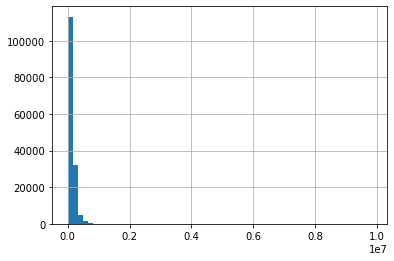

In [21]:
#Plots for price
cv_data['Price'].hist(bins = 60)

<ipython-input-22-18c0827f894c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data['log_price'] = np.log(cv_data['Price'])


<AxesSubplot:>

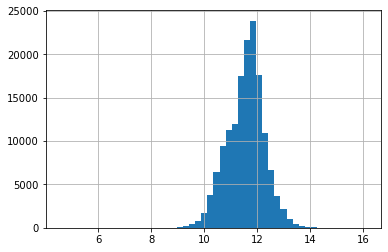

In [22]:
cv_data['log_price'] = np.log(cv_data['Price'])
cv_data['log_price'].hist(bins = 50)

In [23]:
#Mean Price of the houses in each year
cv_data.groupby('Year of Transfer')['Price'].mean()

Year of Transfer
1995     51601.704022
1996     52278.949508
1997     55857.809251
1998     58934.045508
1999     64643.636993
2000     73803.794347
2001     80820.995892
2002     97230.889517
2003    114213.810521
2004    132302.470503
2005    139315.190583
2006    150503.671201
2007    155866.060046
2008    149328.949431
2009    146070.659035
2010    150699.391548
2011    147164.364173
2012    149762.942138
2013    160178.237239
2014    169932.669086
2015    185325.579797
2016    193965.869780
2017    219906.854501
2018    226488.986867
2019    228319.957534
2020    235132.350942
2021    253940.735476
Name: Price, dtype: float64

C:\Users\gpathak2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


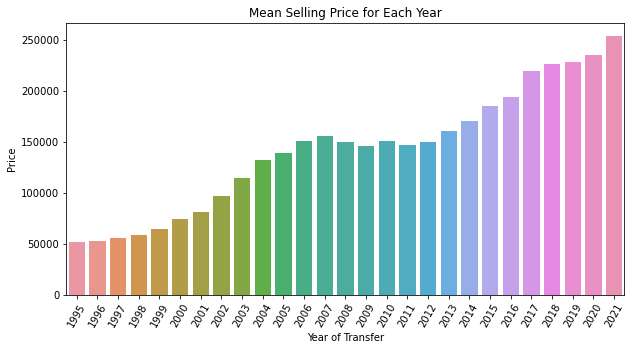

In [24]:
cv_data.groupby('Year of Transfer', as_index=False)['Price'].mean()

# plot
plt.figure(figsize=(10,5))
p = sns.barplot('Year of Transfer', 'Price', data= cv_data, ci=False)
p.set_title('Mean Selling Price for Each Year')
p.set_xticklabels(p.get_xticklabels(), rotation=60)
plt.show()

In [25]:
#Median Price for different property type each year
df_meadian = cv_data.groupby(['Property Type','Year of Transfer'],as_index=False)['Price'].median()

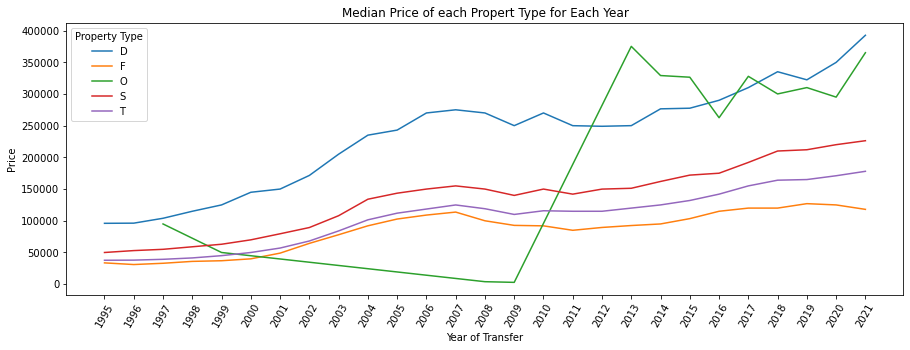

In [26]:
#cv_data.groupby(['Property Type','Year of Transfer'],as_index=False)['Price'].median()
#line plot for meadian 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
p = sns.lineplot(data= df_meadian , x='Year of Transfer', y='Price', hue='Property Type')
p.set_title('Median Price of each Propert Type for Each Year')
plt.setp(p.get_xticklabels(), visible = True,rotation=60)
plt.show()

In [27]:
cv_data[cv_data['Property Type']=='O']

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year of Transfer,log_price
2347137,{5CF9903C-FB92-7F13-E053-6C04A8C074B1},95000,CV5 6EJ,O,N,L,52A,EARLSDON STREET,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,1997,11.461632
3924270,{42A5A70A-343F-56E8-E050-A8C06205331E},50000,CV3 1HZ,O,N,F,10,BINLEY ROAD,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,1999,10.819778
15559733,{42A5A70A-2269-56E8-E050-A8C06205331E},3950,CV7 7BN,O,N,F,2,LAVENDER HALL LANE,COVENTRY,SOLIHULL,WEST MIDLANDS,B,A,2008,8.281471
15816779,{404A5AF4-7527-CD2B-E050-A8C063055C7B},2900,CV7 9BT,O,N,L,71,ARMSON ROAD,COVENTRY,NUNEATON AND BEDWORTH,WARWICKSHIRE,B,A,2009,7.972466
18919686,{21E5FEB6-80A8-2439-E050-A8C06205342E},2000000,CV4 9AQ,O,N,F,79,TORRINGTON AVENUE,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,2013,14.508658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26461326,{CD5A9DCC-C7E3-310A-E053-6C04A8C00A1F},9498,CV5 6ER,O,N,F,47,MOOR STREET,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,2021,9.158837
26462581,{CD5A9DCC-C7F4-310A-E053-6C04A8C00A1F},88000,CV2 1NG,O,N,L,89,CHERRY BROOK WAY,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,2021,11.385092
26464748,{CD5A9DCC-C842-310A-E053-6C04A8C00A1F},350000,CV6 5AJ,O,N,F,ST PAULS CHURCH HALL,FOLESHILL ROAD,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,2021,12.765688
26465731,{CD5A9DCC-C85B-310A-E053-6C04A8C00A1F},400000,CV5 6BU,O,N,F,BURNSALL ROAD INDUSTRIAL ESTATE,BURNSALL ROAD,COVENTRY,COVENTRY,WEST MIDLANDS,B,A,2021,12.899220


In [28]:
df_meadian1 = df_meadian[df_meadian['Property Type'] != 'O'].copy()

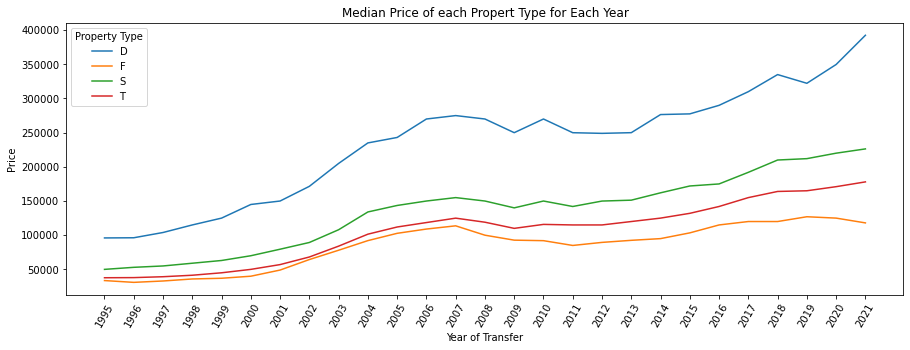

In [29]:
#line plot for meadian 
plt.figure(figsize=(15,5))
p = sns.lineplot(data= df_meadian1 , x='Year of Transfer', y='Price', hue='Property Type')
p.set_title('Median Price of each Propert Type for Each Year')
plt.setp(p.get_xticklabels(), rotation=60)
plt.show()

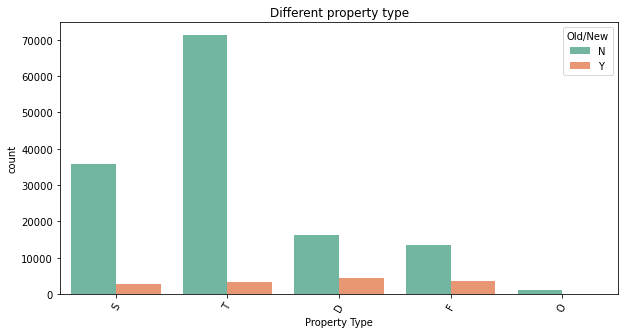

In [30]:
#Plot for preoperty type

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=cv_data,
    x= cv_data['Property Type'],hue= cv_data['Old/New'],
    palette='Set2'
)
chart.set_title('Different property type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

<AxesSubplot:title={'center':'UK County House Prices'}>

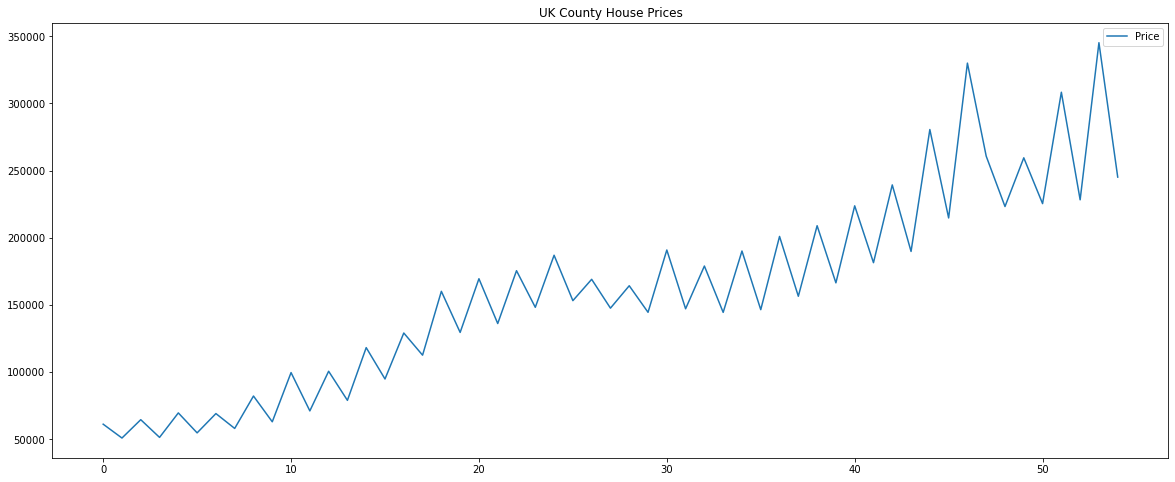

In [31]:
#plot for price for County attribute
county_data = cv_data.groupby(['Year of Transfer', 'County'], as_index=False)['Price'].mean()
county_data.plot(figsize = (20,8), title = 'UK County House Prices')

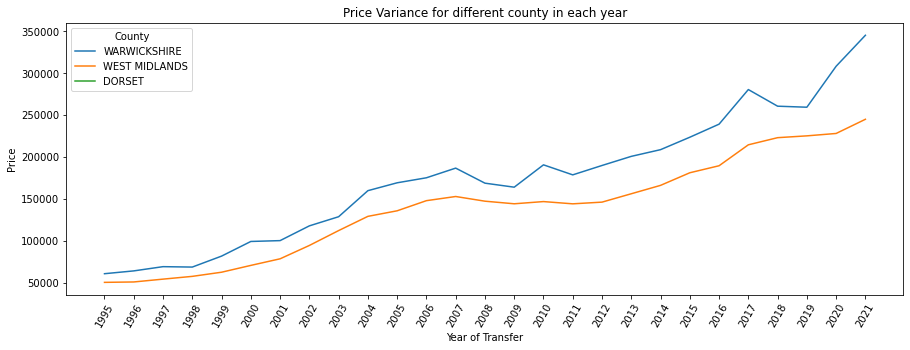

In [32]:
#line plot for different county 
plt.figure(figsize=(15,5))
p = sns.lineplot(data= county_data , x='Year of Transfer', y='Price', hue='County')
p.set_title('Price Variance for different county in each year')
plt.setp(p.get_xticklabels(), rotation=60)
plt.show()

In [33]:
county_data1 = county_data[county_data['County'] != 'DORSET'].copy()

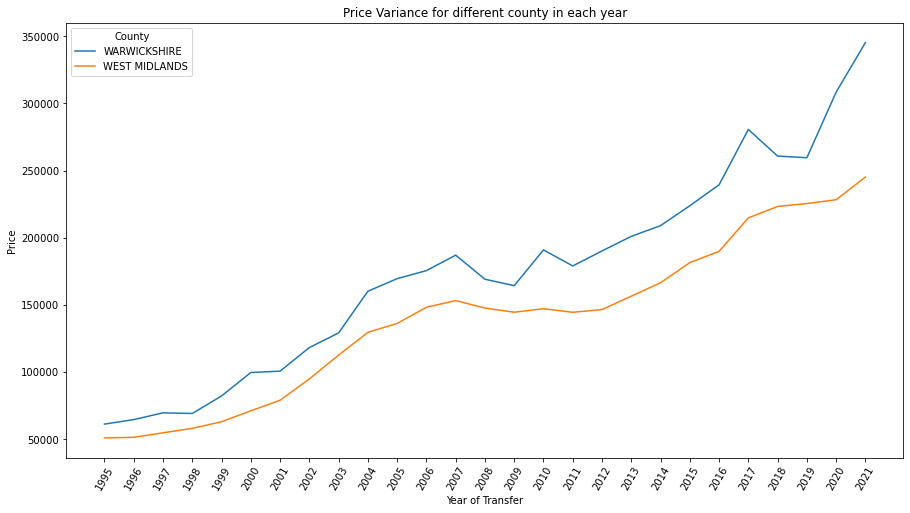

In [34]:
#line plot for county 
plt.figure(figsize=(15,8))
p = sns.lineplot(data= county_data1 , x='Year of Transfer', y='Price', hue='County')
p.set_title('Price Variance for different county in each year')
plt.setp(p.get_xticklabels(), rotation=60)
plt.show()

In [35]:
cv_data[cv_data['County']=='DORSET']

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year of Transfer,log_price
23267409,{7E86B6FB-A422-458C-E053-6B04A8C0C84C},330000,CV4 8GP,O,N,F,288,WESTWOOD HEATH ROAD,COVENTRY,EAST DORSET,DORSET,B,A,2018,12.706848


In [36]:
county_data

,Year of Transfer,County,Price
0,1995,WARWICKSHIRE,61212.199313
1,1995,WEST MIDLANDS,50904.284040
2,1996,WARWICKSHIRE,64563.469945
3,1996,WEST MIDLANDS,51383.483569
4,1997,WARWICKSHIRE,69606.503497
5,1997,WEST MIDLANDS,54749.543593
6,1998,WARWICKSHIRE,69115.714286
7,1998,WEST MIDLANDS,58045.924867
8,1999,WARWICKSHIRE,82172.204583
9,1999,WEST MIDLANDS,62987.287659


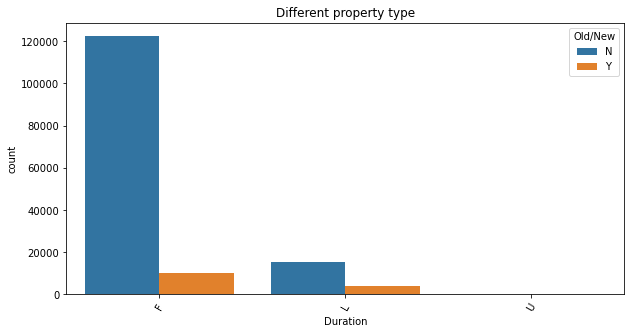

In [37]:
#plot for duration on different property

plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=cv_data,
    x= cv_data['Duration'],hue= cv_data['Old/New']
    
)
chart.set_title('Different property type')
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

In [40]:
Duration = pd.crosstab(cv_data['Duration'], cv_data['Old/New'])

In [41]:
Duration

Old/New,N,Y
Duration,,
F,122652,10274
L,15362,3997
U,17,3


<function matplotlib.pyplot.show(close=None, block=None)>

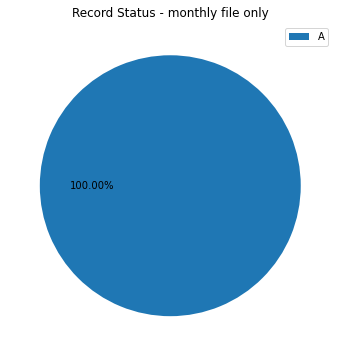

In [43]:
#pie chart for record status
plt.figure(figsize = (6,6))

labels = ['A', 'C', 'D']
plt.pie(cv_data['Record Status - monthly file only'].value_counts(), autopct = '%0.2f%%')
plt.title('Record Status - monthly file only')
plt.legend(labels)
plt.show

In [44]:
cert = pd.read_csv('C:/Users/gpathak2/Downloads/all-domestic-certificates/domestic-E08000026-Coventry/certificates.csv')
cert.head()

C:\Users\gpathak2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT
0,727630869842011112819332895392088,"108, Purcell Road",NaN,NaN,CV6 7LB,7893463968,D,D,66,66,...,natural,"108, Purcell Road",Coventry,Coventry North East,COVENTRY,England and Wales: 1930-1949,2011-11-28 19:33:28,rental (social),4.0,3.0
1,758237059222013112418463386408897,"165, St. Georges Road",NaN,NaN,CV1 2DH,9857516968,D,B,66,87,...,natural,"165, St. Georges Road",Coventry,Coventry South,COVENTRY,England and Wales: 1900-1929,2013-11-24 18:46:33,rental (private),8.0,5.0
2,486717409202016102813151472662268,"17, The Riddings",NaN,NaN,CV5 6AT,2203506768,C,B,70,84,...,natural,"17, The Riddings",Coventry,Coventry South,COVENTRY,England and Wales: 1950-1966,2016-10-28 13:15:14,owner-occupied,NaN,NaN
3,296595879202014011920153761249518,"81, Blythe Road",NaN,NaN,CV1 5AU,9204072668,C,A,69,92,...,natural,"81, Blythe Road",Coventry,Coventry South,COVENTRY,England and Wales: 1900-1929,2014-01-19 20:15:37,rental (private),7.0,3.0
4,494713053512010070520251596000278,"4, Valencia Road",NaN,NaN,CV3 2AF,2837366768,C,C,79,79,...,natural,"4, Valencia Road",Coventry,Coventry North East,COVENTRY,England and Wales: 2003-2006,2010-07-05 20:25:15,owner-occupied,NaN,NaN


In [45]:
##multiple descriptvie columns are available which is not helpful in our price prediction

##Dropping Desriptive Columns
cert = cert.drop(columns=['LIGHTING_DESCRIPTION' , 'MAINHEATCONT_DESCRIPTION', 'MAINHEAT_DESCRIPTION' ,'ROOF_DESCRIPTION', 'SECONDHEAT_DESCRIPTION', 'WALLS_DESCRIPTION', 'WINDOWS_DESCRIPTION','FLOOR_DESCRIPTION', 'HOTWATER_DESCRIPTION'])
cert.shape

(125481, 81)

In [46]:
cert['COUNTY'].unique()

array([nan, 'Greater London Authority'], dtype=object)

In [47]:
cert = cert.drop(columns=['COUNTY'])
cert.shape

(125481, 80)

In [48]:
##Drop columns 
cert = cert.drop(columns=['ADDRESS1' , 'ADDRESS2', 'ADDRESS3'])
cert.shape

(125481, 77)

In [49]:
cert.isnull().sum()

LMK_KEY                             0
POSTCODE                            0
BUILDING_REFERENCE_NUMBER           0
CURRENT_ENERGY_RATING               0
POTENTIAL_ENERGY_RATING             0
                                ...  
CONSTRUCTION_AGE_BAND            1313
LODGEMENT_DATETIME                  0
TENURE                           2841
FIXED_LIGHTING_OUTLETS_COUNT    71190
LOW_ENERGY_FIXED_LIGHT_COUNT    73964
Length: 77, dtype: int64

In [50]:
cert = cert.drop(columns=['FLAT_TOP_STOREY','FLAT_STOREY_COUNT','FLOOR_ENERGY_EFF','FLOOR_ENV_EFF'])
cert.shape

(125481, 73)

In [51]:
##Dropping multiple unique refrences
cert = cert.drop(columns=['LMK_KEY','BUILDING_REFERENCE_NUMBER'])
cert.shape

(125481, 71)

In [52]:
#Deleting multiple Dates
cert = cert.drop(columns=['LODGEMENT_DATE','INSPECTION_DATE'])
cert.shape

(125481, 69)

In [53]:
##Dropping null value Columns
cert = cert.drop(columns=['SHEATING_ENERGY_EFF','SHEATING_ENV_EFF','UNHEATED_CORRIDOR_LENGTH','FLOOR_HEIGHT','PHOTO_SUPPLY','SOLAR_WATER_HEATING_FLAG','FIXED_LIGHTING_OUTLETS_COUNT','LOW_ENERGY_FIXED_LIGHT_COUNT'])
cert.shape

(125481, 61)

In [54]:
#Deleting multiple Dates
cert = cert.drop(columns=['LODGEMENT_DATETIME','TENURE'])
cert.shape

(125481, 59)

In [55]:
cert.isnull().sum()

POSTCODE                             0
CURRENT_ENERGY_RATING                0
POTENTIAL_ENERGY_RATING              0
CURRENT_ENERGY_EFFICIENCY            0
POTENTIAL_ENERGY_EFFICIENCY          0
PROPERTY_TYPE                        0
BUILT_FORM                           2
LOCAL_AUTHORITY                      0
CONSTITUENCY                         0
TRANSACTION_TYPE                     0
ENVIRONMENT_IMPACT_CURRENT           0
ENVIRONMENT_IMPACT_POTENTIAL         0
ENERGY_CONSUMPTION_CURRENT           0
ENERGY_CONSUMPTION_POTENTIAL         0
CO2_EMISSIONS_CURRENT                0
CO2_EMISS_CURR_PER_FLOOR_AREA        0
CO2_EMISSIONS_POTENTIAL              0
LIGHTING_COST_CURRENT                0
LIGHTING_COST_POTENTIAL              0
HEATING_COST_CURRENT                 0
HEATING_COST_POTENTIAL               0
HOT_WATER_COST_CURRENT               0
HOT_WATER_COST_POTENTIAL             0
TOTAL_FLOOR_AREA                     0
ENERGY_TARIFF                        0
MAINS_GAS_FLAG           

In [56]:
cert['BUILT_FORM'].unique()

array(['NO DATA!', 'Mid-Terrace', 'Detached', 'Semi-Detached',
       'End-Terrace', 'Enclosed End-Terrace', 'Enclosed Mid-Terrace', nan],
      dtype=object)

In [57]:
cert1 = cert.copy()
cert1.isnull().sum()

POSTCODE                             0
CURRENT_ENERGY_RATING                0
POTENTIAL_ENERGY_RATING              0
CURRENT_ENERGY_EFFICIENCY            0
POTENTIAL_ENERGY_EFFICIENCY          0
PROPERTY_TYPE                        0
BUILT_FORM                           2
LOCAL_AUTHORITY                      0
CONSTITUENCY                         0
TRANSACTION_TYPE                     0
ENVIRONMENT_IMPACT_CURRENT           0
ENVIRONMENT_IMPACT_POTENTIAL         0
ENERGY_CONSUMPTION_CURRENT           0
ENERGY_CONSUMPTION_POTENTIAL         0
CO2_EMISSIONS_CURRENT                0
CO2_EMISS_CURR_PER_FLOOR_AREA        0
CO2_EMISSIONS_POTENTIAL              0
LIGHTING_COST_CURRENT                0
LIGHTING_COST_POTENTIAL              0
HEATING_COST_CURRENT                 0
HEATING_COST_POTENTIAL               0
HOT_WATER_COST_CURRENT               0
HOT_WATER_COST_POTENTIAL             0
TOTAL_FLOOR_AREA                     0
ENERGY_TARIFF                        0
MAINS_GAS_FLAG           

In [58]:
cert1 = cert1.drop(columns= ['CONSTRUCTION_AGE_BAND', 'POSTTOWN','MECHANICAL_VENTILATION' , 'HEAT_LOSS_CORRIDOR' , 'WIND_TURBINE_COUNT','ROOF_ENV_EFF' , 'ROOF_ENERGY_EFF', 'NUMBER_OPEN_FIREPLACES' , 'LOW_ENERGY_LIGHTING' ]

SyntaxError: unexpected EOF while parsing (<ipython-input-58-41ec72c0eedd>, line 1)

In [59]:
#Deleting multiple Dates
cert1 = cert1.drop(columns=['CONSTRUCTION_AGE_BAND'])
cert1.shape

(125481, 58)

In [60]:
#Deleting multiple Data
cert1 = cert1.drop(columns=['POSTTOWN','MECHANICAL_VENTILATION' , 'HEAT_LOSS_CORRIDOR' , 'WIND_TURBINE_COUNT','ROOF_ENV_EFF' , 'ROOF_ENERGY_EFF'])
cert1.shape

(125481, 52)

In [61]:
#Deleting multiple Dates
cert1 = cert1.drop(columns=['NUMBER_OPEN_FIREPLACES' , 'LOW_ENERGY_LIGHTING' ])
cert1.shape

(125481, 50)

In [62]:
#Deleting multiple Data
cert1 = cert1.drop(columns=['MAINS_GAS_FLAG' , 'FLOOR_LEVEL' , 'MAIN_HEATING_CONTROLS', 'MULTI_GLAZE_PROPORTION' , 'GLAZED_TYPE', 'GLAZED_AREA'])
cert1.shape

(125481, 44)

In [63]:
cert2 = cert1.dropna()

In [64]:
cert2.shape

(114229, 44)

In [65]:
##Cleaning the data value of price paid dataset to merge both the dataset
cv_data['Postcode'] = cv_data['Postcode'].astype(str).str.lower()
cv_data['Postcode'] = cv_data['Postcode'].str.replace(' ', '')
cv_data['PAON'] = cv_data['PAON'].astype(str).str.lower()
cv_data['PAON'] = cv_data['PAON'].str.replace(' ', '')
cv_data['Street'] = cv_data['Street'].astype(str).str.lower()

cv_data.head()

<ipython-input-65-e37585d25bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data['Postcode'] = cv_data['Postcode'].astype(str).str.lower()
<ipython-input-65-e37585d25bc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data['Postcode'] = cv_data['Postcode'].str.replace(' ', '')
<ipython-input-65-e37585d25bc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,Street,Town/City,District,County,PPD Category Type,Record Status - monthly file only,Year of Transfer,log_price
41,{587DF24E-FF43-4F1E-A5EF-5A06BBD7C6B3},69250,cv77db,S,N,F,15,benton green lane,COVENTRY,SOLIHULL,WEST MIDLANDS,A,A,1995,11.145478
330,{5A77BC03-713A-4035-B903-5672E7238836},35000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,WEST MIDLANDS,A,A,1995,10.463103
388,{58ED653C-9F37-4AA5-86C1-4F5074FAA980},50000,cv49fs,S,N,F,58,fir tree avenue,COVENTRY,COVENTRY,WEST MIDLANDS,A,A,1995,10.819778
417,{CB2B2819-C4DB-4145-9F64-5674723FBAFF},36000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,WEST MIDLANDS,A,A,1995,10.491274
754,{A56459F3-387D-4A1B-B2BC-4BC6D143367C},44250,cv62at,T,N,F,120,overslade crescent,COVENTRY,COVENTRY,WEST MIDLANDS,A,A,1995,10.697611


In [66]:
##Splitting the column to merger both the dataset
cert2[['PAON', 'Street']] = cert2['ADDRESS'].str.split(',',1,expand=True)
cert2.head()

C:\Users\gpathak2\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,POSTCODE,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,...,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,PAON,Street
0,CV6 7LB,D,D,66,66,Flat,NO DATA!,E08000026,E14000649,rental (social),...,Good,Good,Very Good,Very Good,mains gas (not community),"108, Purcell Road",Coventry,Coventry North East,108,Purcell Road
1,CV1 2DH,D,B,66,87,House,Mid-Terrace,E08000026,E14000651,rental (private),...,Good,Good,Good,Good,mains gas (not community),"165, St. Georges Road",Coventry,Coventry South,165,St. Georges Road
2,CV5 6AT,C,B,70,84,Bungalow,Detached,E08000026,E14000651,marketed sale,...,Good,Good,Very Good,Very Good,mains gas (not community),"17, The Riddings",Coventry,Coventry South,17,The Riddings
3,CV1 5AU,C,A,69,92,House,Mid-Terrace,E08000026,E14000651,rental (private),...,Good,Good,Average,Average,mains gas (not community),"81, Blythe Road",Coventry,Coventry South,81,Blythe Road
4,CV3 2AF,C,C,79,79,House,Semi-Detached,E08000026,E14000649,marketed sale,...,Good,Good,Very Good,Very Good,mains gas - this is for backwards compatibilit...,"4, Valencia Road",Coventry,Coventry North East,4,Valencia Road


In [67]:
##Cleaning the data value of Certificate dataset to merge both the dataset

cert2['POSTCODE'] = cert2['POSTCODE'].astype(str).str.lower()
cert2['POSTCODE'] = cert2['POSTCODE'].str.replace(' ', '')
cert2['PAON'] = cert2['PAON'].astype(str).str.lower()
cert2['PAON'] = cert2['PAON'].str.replace(' ', '')
cert2['Street'] = cert2['Street'].astype(str).str.lower()
cert2.head()

<ipython-input-67-7ce3c0d0c948>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cert2['POSTCODE'] = cert2['POSTCODE'].astype(str).str.lower()
<ipython-input-67-7ce3c0d0c948>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cert2['POSTCODE'] = cert2['POSTCODE'].str.replace(' ', '')
<ipython-input-67-7ce3c0d0c948>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,POSTCODE,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,...,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,PAON,Street
0,cv67lb,D,D,66,66,Flat,NO DATA!,E08000026,E14000649,rental (social),...,Good,Good,Very Good,Very Good,mains gas (not community),"108, Purcell Road",Coventry,Coventry North East,108,purcell road
1,cv12dh,D,B,66,87,House,Mid-Terrace,E08000026,E14000651,rental (private),...,Good,Good,Good,Good,mains gas (not community),"165, St. Georges Road",Coventry,Coventry South,165,st. georges road
2,cv56at,C,B,70,84,Bungalow,Detached,E08000026,E14000651,marketed sale,...,Good,Good,Very Good,Very Good,mains gas (not community),"17, The Riddings",Coventry,Coventry South,17,the riddings
3,cv15au,C,A,69,92,House,Mid-Terrace,E08000026,E14000651,rental (private),...,Good,Good,Average,Average,mains gas (not community),"81, Blythe Road",Coventry,Coventry South,81,blythe road
4,cv32af,C,C,79,79,House,Semi-Detached,E08000026,E14000649,marketed sale,...,Good,Good,Very Good,Very Good,mains gas - this is for backwards compatibilit...,"4, Valencia Road",Coventry,Coventry North East,4,valencia road


In [68]:
##Join the dataset
joint_data1 = pd.merge(cv_data, cert2, left_on = ['Postcode', 'PAON'], right_on = ['POSTCODE' , 'PAON'])
joint_data1.head()

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,Street_x,Town/City,District,...,MAINHEAT_ENV_EFF,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,Street_y
0,{5A77BC03-713A-4035-B903-5672E7238836},35000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
1,{0B4E5EDA-15C3-410B-823C-4EC87A508052},33000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
2,{5337E544-5DCF-4130-B7C0-48C7916EAE55},54650,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
3,{BB19E2CF-3C1E-4C9E-8096-FFCDC4495F84},115000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
4,{CB2B2819-C4DB-4145-9F64-5674723FBAFF},36000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas - this is for backwards compatibilit...,"35, Lower Ford Street",Coventry,Coventry South,lower ford street


In [69]:
joint_data1.shape

(115372, 60)

In [70]:
joint_data1.head(50)

,Transaction unique identifier,Price,Postcode,Property Type,Old/New,Duration,PAON,Street_x,Town/City,District,...,MAINHEAT_ENV_EFF,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,Street_y
0,{5A77BC03-713A-4035-B903-5672E7238836},35000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
1,{0B4E5EDA-15C3-410B-823C-4EC87A508052},33000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
2,{5337E544-5DCF-4130-B7C0-48C7916EAE55},54650,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
3,{BB19E2CF-3C1E-4C9E-8096-FFCDC4495F84},115000,cv35pq,T,N,F,36,calvert close,COVENTRY,COVENTRY,...,Good,Very Poor,Very Poor,Poor,Poor,mains gas - this is for backwards compatibilit...,"36, Calvert Close",Coventry,Coventry South,calvert close
4,{CB2B2819-C4DB-4145-9F64-5674723FBAFF},36000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas - this is for backwards compatibilit...,"35, Lower Ford Street",Coventry,Coventry South,lower ford street
5,{CB2B2819-C4DB-4145-9F64-5674723FBAFF},36000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas (not community),"35, Lower Ford Street",Coventry,Coventry South,lower ford street
6,{C097F7F4-6E62-41F0-BC30-46C797A4FA6D},12000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas - this is for backwards compatibilit...,"35, Lower Ford Street",Coventry,Coventry South,lower ford street
7,{C097F7F4-6E62-41F0-BC30-46C797A4FA6D},12000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas (not community),"35, Lower Ford Street",Coventry,Coventry South,lower ford street
8,{460DDE15-4025-411F-8F2F-F59BEC3FB597},65000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas - this is for backwards compatibilit...,"35, Lower Ford Street",Coventry,Coventry South,lower ford street
9,{460DDE15-4025-411F-8F2F-F59BEC3FB597},65000,cv15ps,T,N,F,35,lower ford street,COVENTRY,COVENTRY,...,Good,Average,Average,Very Good,Very Good,mains gas (not community),"35, Lower Ford Street",Coventry,Coventry South,lower ford street


In [71]:
jd = joint_data1.copy()

In [72]:
jd['Year'] = jd['Year of Transfer'].astype(str).astype(int)

In [73]:
##identifying rows with only one unique value
jd[['Town/City','District', 'County','CONSTITUENCY','LOCAL_AUTHORITY','LOCAL_AUTHORITY_LABEL','Record Status - monthly file only','PPD Category Type']].groupby('Town/City').agg(['nunique'])


,District,County,CONSTITUENCY,LOCAL_AUTHORITY,LOCAL_AUTHORITY_LABEL,Record Status - monthly file only,PPD Category Type
,nunique,nunique,nunique,nunique,nunique,nunique,nunique
Town/City,,,,,,,
COVENTRY,6,2,3,1,1,1,2


In [74]:
#Deleting Rows with only one unique value:
##Drop columns 
jd = jd.drop(columns=['Town/City' , 'Record Status - monthly file only','LOCAL_AUTHORITY','LOCAL_AUTHORITY_LABEL' , 'Year of Transfer'])
jd.shape

(115372, 56)

In [75]:
jd = jd.drop(columns=['Street_y', 'POSTCODE' ])
jd.shape

(115372, 54)

In [76]:
#splitting Train and Test Data
train_df = jd[jd['Year'] > 2016]
train_df.shape

(20756, 54)

In [77]:
test_df = jd[jd['Year'] <= 2016]
test_df.shape

(94616, 54)

In [ ]:
jd.to_csv('jd.csv')
train_df.to_csv('train_df.csv')
test_df.to_csv('test_df.csv')